In [8]:
import tensorflow as tf
from utils import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

raw_model = tf.keras.applications.vgg16.VGG16(include_top=True, weights='imagenet')
export_dropout_vgg16(0.5)
dropout_model = tf.keras.models.load_model("dropout_model.h5")
layer_name = "block5_conv3"

In [9]:
input_image = np.load("/Users/nsato/Desktop/ILSVRC2012_val_00020917_image.npy")
preprocessed_input = np.expand_dims(tf.keras.applications.vgg16.preprocess_input(input_image), 0)

In [10]:
category_index = np.argmax(raw_model(preprocessed_input))

In [11]:
gradcam_image, _ = GradCam(raw_model,
        image = preprocessed_input,
        category_index = category_index,
       layer_name = layer_name,
        raw_array = input_image,
        dimension = 224
       )

In [12]:
dropout_gradcam_image, _ = GradCam_Dropout(dropout_model,
        image = preprocessed_input,
        category_index = category_index,
       layer_name = layer_name,
        raw_array = input_image,
        dimension = 224,
        sample = 20
       )

(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)


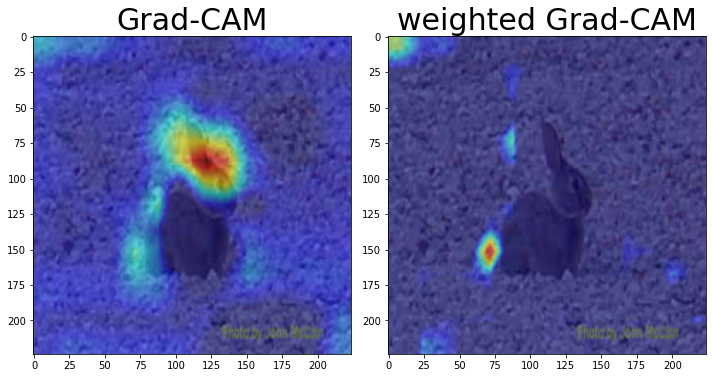

In [13]:
fignum = 2
fig = plt.figure()

ax0 = fig.add_subplot(1, fignum, 1)
ax0.imshow(Image.fromarray(gradcam_image))
ax0.set_title('Grad-CAM', fontsize=30)

ax1 = fig.add_subplot(1, fignum, 2)
ax1.imshow(Image.fromarray(dropout_gradcam_image))
ax1.set_title('weighted Grad-CAM', fontsize=30)

fig.set_size_inches(10, 10)
fig.tight_layout()